<a href="https://colab.research.google.com/github/siu1997/MSc-Part-1-Sem-1/blob/main/Practical7/Exploratory_Data_Analysis_and_Time_Series_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Why Exploratory Data Analysis?
You might have heard that before proceeding with a machine learning problem 
it is good to do en end-to-end analysis of the data by carrying a proper exploratory 
data analysis. A common question that pops in people’s head after listening to this
 as to why EDA?
· What is it, that makes EDA so important?
· How to do proper EDA and get insights from the data?
· What is the right way to begin with exploratory data analysis?
So, let us how we can perform exploratory data analysis and get useful insights from
 our data. For performing EDA I will take dataset

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import random
from sklearn.preprocessing import OrdinalEncoder
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import pywt

In [ ]:
calendar_pd=pd.read_csv('/content/sample_data/calendar.csv')


In [ ]:

print('*********************Calendar Dataframe*******************',calendar_pd.shape)
calendar_pd.head()

*********************Calendar Dataframe******************* (78939, 7)


,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,11551,2019-11-06,f,$105.00,$105.00,3,180
1,90700,2019-11-06,f,$125.00,$125.00,90,1125
2,90700,2019-11-07,f,$125.00,$125.00,90,1125
3,90700,2019-11-08,f,$125.00,$125.00,90,1125
4,90700,2019-11-09,f,$125.00,$125.00,90,1125


In [ ]:
Sales Evaluation Dataframe¶

In [ ]:
The Data
Let's start by reading in the titanic_train.csv file into a pandas dataframe.

In [ ]:
Exploratory Data Analysis
Let's begin some exploratory data analysis! We'll start by checking out missing data!

Missing Data
We can use seaborn to create a simple heatmap to see where we are missing data!

In [ ]:
calendar_pd.isnull()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
78934,False,False,False,False,False,False,False
78935,False,False,False,False,False,False,False
78936,False,False,False,False,False,False,False
78937,False,False,False,False,False,False,False


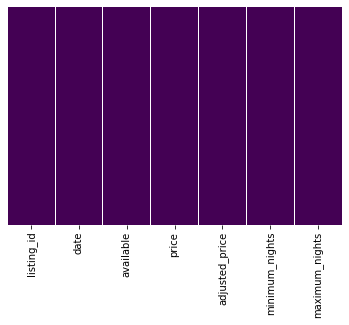

In [ ]:
sns.heatmap(calendar_pd.isnull(),yticklabels=False,cbar=False,cmap='viridis')

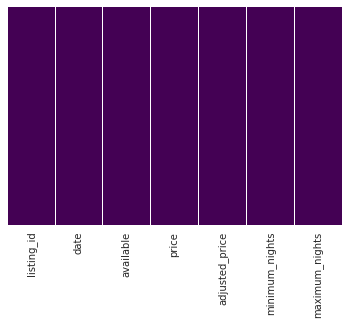

In [ ]:
sns.heatmap(calendar_pd.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

Let's continue on by visualizing some more of the data!

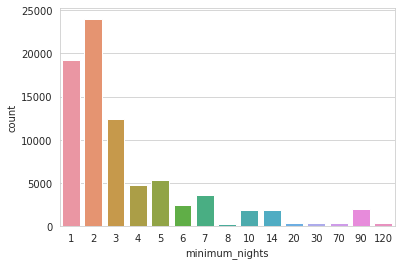

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='minimum_nights',data=calendar_pd)

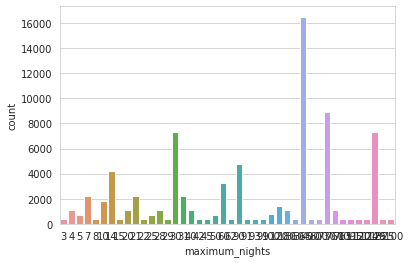

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='maximum_nights',data=calendar_pd)

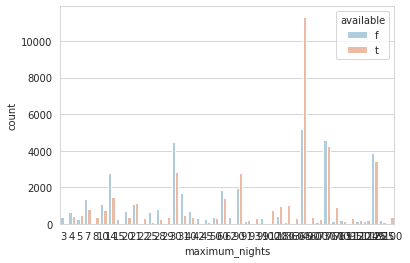

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='maximum_nights',hue='available',data=calendar_pd,palette='RdBu_r')

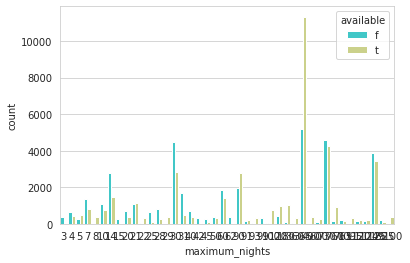

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='maximum_nights',hue='available',data=calendar_pd,palette='rainbow')

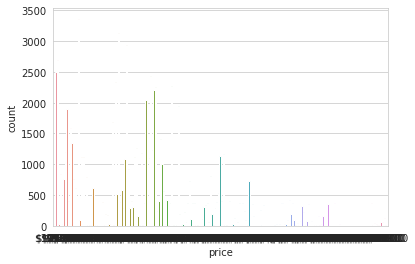

In [ ]:
sns.countplot(x='price',data=calendar_pd)

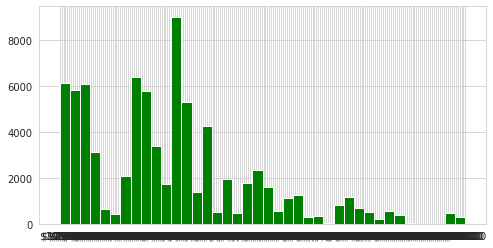

In [ ]:
calendar_pd['price'].hist(color='green',bins=40,figsize=(8,4))

In [ ]:
Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation). However we can be smarter about this and check the average age by passenger class. For example:

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [ ]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [ ]:

Now apply that function!

In [ ]:
calendar_pd['price'] = calendar_pd[['price','maximum_nights']].apply(impute_age,axis=1)

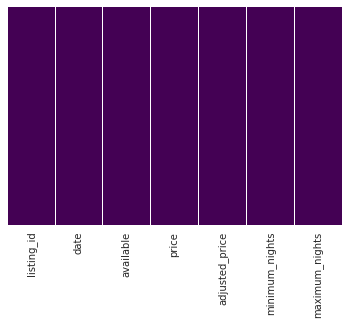

In [ ]:
sns.heatmap(calendar_pd.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
Great! Let's go ahead and drop the Cabin column and the row in Embarked that is NaN.

In [ ]:
calendar_pd.drop('listing_id',axis=1,inplace=True)

In [ ]:

calendar_pd.head()

,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,2019-11-06,f,$105.00,$105.00,3,180
1,2019-11-06,f,$125.00,$125.00,90,1125
2,2019-11-07,f,$125.00,$125.00,90,1125
3,2019-11-08,f,$125.00,$125.00,90,1125
4,2019-11-09,f,$125.00,$125.00,90,1125


In [ ]:
calendar_pd.dropna(inplace=True)

In [ ]:
Converting Categorical Features
We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [ ]:

calendar_pd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78939 entries, 0 to 78938
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            78939 non-null  object
 1   available       78939 non-null  object
 2   price           78939 non-null  object
 3   adjusted_price  78939 non-null  object
 4   minimum_nights  78939 non-null  int64 
 5   maximum_nights  78939 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 4.2+ MB


In [ ]:
pd.get_dummies(calendar_pd['price'],drop_first=True).head()

,$100.00,$101.00,$102.00,$103.00,$104.00,$105.00,$106.00,$107.00,$108.00,$109.00,$110.00,$111.00,$112.00,$113.00,$114.00,$115.00,$116.00,$117.00,$118.00,$119.00,$120.00,$123.00,$125.00,$128.00,$129.00,$130.00,$132.00,$133.00,$134.00,$135.00,$138.00,$139.00,$140.00,$141.00,$144.00,$148.00,$150.00,$153.00,$156.00,$158.00,...,$62.00,$64.00,$65.00,$67.00,$68.00,$69.00,$70.00,$700.00,$71.00,$72.00,$73.00,$75.00,$76.00,$77.00,$78.00,$79.00,$80.00,$81.00,$82.00,$83.00,$84.00,$85.00,$86.00,$87.00,$88.00,$89.00,$90.00,$900.00,$908.00,$91.00,$914.00,$92.00,$926.00,$93.00,$94.00,$95.00,$96.00,$97.00,$98.00,$99.00
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
pd.get_dummies(calendar_pd['available'],drop_first=True).head()

,t
0,0
1,0
2,0
3,0
4,0


In [ ]:
listing_id = pd.get_dummies(calendar_pd['price'],drop_first=True)
available = pd.get_dummies(calendar_pd['available'],drop_first=True)

In [ ]:
calendar_pd.drop(['price','available','available','price'],axis=1,inplace=True)

In [ ]:
calendar_pd.head()

,date,adjusted_price,minimum_nights,maximum_nights
0,2019-11-06,$105.00,3,180
1,2019-11-06,$125.00,90,1125
2,2019-11-07,$125.00,90,1125
3,2019-11-08,$125.00,90,1125
4,2019-11-09,$125.00,90,1125


In [ ]:
calendar_pd = pd.concat([calendar_pd,available,available],axis=1)

In [ ]:
calendar_pd.head()

,date,adjusted_price,minimum_nights,maximum_nights,t,t
0,2019-11-06,$105.00,3,180,0,0
1,2019-11-06,$125.00,90,1125,0,0
2,2019-11-07,$125.00,90,1125,0,0
3,2019-11-08,$125.00,90,1125,0,0
4,2019-11-09,$125.00,90,1125,0,0


In [ ]:

Our data is ready for our model!

In [ ]:
Time Series - Exploratory Data Analysis

In [ ]:
Import & Clean Data
Let us read the State Time Series data and do some basic analysis. The data is available from 2010 onwards,
 so let us remove the previous data from the data set.

In [ ]:
import pandas as pd
df = pd.read_csv('/content/sample_data/state_time_series.csv')
df.Date = pd.to_datetime(df.Date)
df = df[df['Date'] <= '03-28-2020']
df.head()

,Date,State,DateDate,Positive,Negative,Pending,Hospitalized,Death,Total
0,1970-01-01 00:00:00.020200306,AK,3/6/20,0.0,8.0,1.0,NaN,NaN,9.0
1,1970-01-01 00:00:00.020200307,AK,3/7/20,0.0,12.0,2.0,NaN,NaN,14.0
2,1970-01-01 00:00:00.020200308,AK,3/8/20,0.0,14.0,6.0,NaN,NaN,20.0
3,1970-01-01 00:00:00.020200309,AK,3/9/20,0.0,23.0,9.0,NaN,NaN,32.0
4,1970-01-01 00:00:00.020200310,AK,3/10/20,0.0,23.0,9.0,NaN,NaN,32.0


In [ ]:
Exploratory Data Analysis (EDA)
Let us explore statewise data.
 Whether there is any trend for a specific state or what are the top 5 states?

In [ ]:
Top 7 States of Positive value
This is the top 7 states of Positive Sqft All Homes

In [ ]:
dfallhomes = df.groupby('State', as_index=False)['Positive'].\
    mean().dropna().sort_values('Positive', ascending=False)
dfallhomes.head(7)

,State,Positive
37,NY,10241.400000
34,NJ,1824.208333
52,WA,1108.880000
5,CA,1014.880000
24,MI,814.958333
20,LA,714.181818
16,IL,696.120000


In [ ]:
Bottom 5 states of Positive
List the bottom 5 states from the results

In [ ]:
dfallhomes.tail(5)

,State,Positive
0,AK,16.521739
54,WV,14.391304
50,VI,10.153846
27,MP,0.153846
3,AS,0.000000


In [ ]:
Correlation
I always have a doubt whether 
various bedroom types have any relation during the trends. Let's find out.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



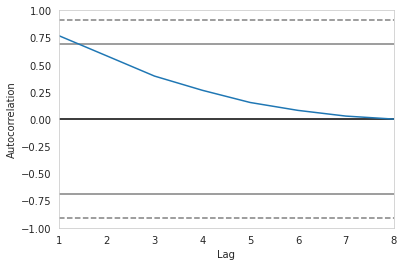

In [ ]:
import matplotlib.pyplot as plt

brtypes = df.groupby('Date')['Date','Positive', 
                             'Negative','Pending','Hospitalized','Death'].\
    mean().dropna()
pd.plotting.autocorrelation_plot(brtypes);
plt.show()

In [ ]:
brtypes.corr()

,Positive,Negative,Pending,Hospitalized,Death
Positive,1.000000,0.999585,0.910970,0.957102,0.993414
Negative,0.999585,1.000000,0.912016,0.958079,0.993327
Pending,0.910970,0.912016,1.000000,0.946940,0.908174
Hospitalized,0.957102,0.958079,0.946940,1.000000,0.977852
Death,0.993414,0.993327,0.908174,0.977852,1.000000


In [ ]:
The above table confirms the correlation and to be more specific let us remove
 the seasonality from the data and see. This is called order of correlation.

In [ ]:
brtypes.diff().corr()

,Positive,Negative,Pending,Hospitalized,Death
Positive,1.000000,0.959068,0.259846,0.655324,0.909276
Negative,0.959068,1.000000,0.260431,0.732786,0.975172
Pending,0.259846,0.260431,1.000000,0.774555,0.232916
Hospitalized,0.655324,0.732786,0.774555,1.000000,0.766340
Death,0.909276,0.975172,0.232916,0.766340,1.000000
